**Construyendo un modelo de k-vecinos más cercanos (k-NN) con Scikit-learn**

k-Nearest-Neighbors (k-NN) consiste en un modelo de aprendizaje automático supervisado, es decir, es un modelo que aprende de datos que ya están previamente etiquetados, tomando un conjunto de objetos de entrada y valores de salida. Posteriormente, el modelo se entrena con esos datos para aprender a asignar las entradas a la salida deseada para que pueda aprender a hacer predicciones sobre datos "invisibles" (no catalogados aún). 

Es aquí que, los modelos k-NN funcionan tomando un punto de datos y mirando los "k" puntos de datos etiquetados más cercanos. Luego, al punto de datos se le asigna la etiqueta de la mayoría de los "k" puntos más cercanos.

En este código usaremos "Scikit-learn", la cual es una biblioteca de aprendizaje automático para Python.

Para nuestro modelo k-NN, el primer paso es leer los datos que usaremos como entrada. Para empezar, usaremos Pandas para leer los datos.

En este conjunto de datos contamos con 1000 entradas, donde cada una de estas representa a una persona que recibe un crédito de un banco alemán. Asimismo, contamos con demás características de los clientes.

In [ ]:
import numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

#Cargamos la base de datos:
data = pd.read_csv('german_credit_data.csv')

# Visualizamos las primeras 6 entradas:
data.head(6)

,Customer,Age,Sex,Sex_Numeric,Job,Housing,Housing_numeric,free,own,rent,Saving accounts,Saving accounts_Numeric,little,moderate,NA,quite_rich,rich,Credit amount,Duration,Purpose,Purpose_Numeric,business,car,domestic_appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,male,0,2,own,1,0,1,0,NaN,0,0,0,1,0,0,1169,6,radio/TV,6,0,0,0,0,0,1,0,0
1,1,22,female,1,2,own,1,0,1,0,little,1,1,0,0,0,0,5951,48,radio/TV,6,0,0,0,0,0,1,0,0
2,2,49,male,0,1,own,1,0,1,0,little,1,1,0,0,0,0,2096,12,education,4,0,0,0,1,0,0,0,0
3,3,45,male,0,2,free,3,1,0,0,little,1,1,0,0,0,0,7882,42,furniture/equipment,5,0,0,0,0,1,0,0,0
4,4,53,male,0,2,free,3,1,0,0,little,1,1,0,0,0,0,4870,24,car,2,0,1,0,0,0,0,0,0
5,5,35,male,0,1,free,3,1,0,0,NaN,0,0,0,1,0,0,9055,36,education,4,0,0,0,1,0,0,0,0


Los datos contenidos en la base son:

1. Edad (numérica)
2. Sexo (categórica: masculino, femenino)
3. Trabajo (numérico: 0 - no calificado y no residente, 1 - no calificado y residente, 2 - calificado, 3 - altamente calificado)
4. Vivienda (categórica: propia, alquilada o gratuita)
5. Ahorro de cuentas (categórica: pequeño, moderado, rico,bastante rico)
6. Monto del crédito (numérico: en DM - Deutsch Mark)
7. Duración (numérica, en meses)
8. Propósito (categórica: automóvil, muebles/equipo, radio/TV, electrodomésticos, reparaciones, educación, negocios, vacaciones/otros)


Realizamos una primera visualización gráfica de nuestros datos no categóricos (numéricos) por medio de un gráfico 3D con ayuda de la paquetería "mpl_toolkits.mplot3d": 


Text(0.5, 0, 'Age')

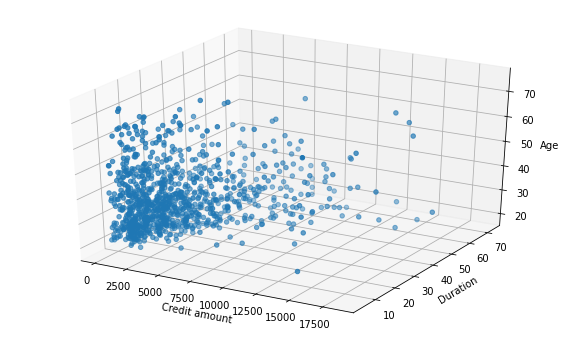

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

Creamos ahora un diccionario que nos servirá al momento de asignar productos a los clientes de acuerdo con su edad y monto de crédito.

In [ ]:
# Diccionario de productos a asignar: 
credict =	{
  "key_A": "Credict Gold",
  "key_B": "Credict Silver ",
  "key_C": "Credict bronze "
}

In [ ]:
class Client(object):

    def set_name(self,name):
      self.name = name

    def set_age(self,age):
      self.age = age

    def set_credit_amount(self,mount):
      self.mount = mount

    def set_duration(self,duration):
      self.duration = duration

    def set_n_age(self,nage):
      self.nage = nage

    def set_n_credit_amount(self,nmount):
      self.nmount = nmount

    def set_n_duration(self,nduration):
      self.nduration = nduration

    def set_key(self,key):
      self.key = key
    
    def set_num_key(self, num_key):
      self.num_key = num_key

    def get_name(self):
      return self.name

    def get_age(self):
      return self.age

    def get_credit_amount(self):
      return self.mount

    def get_duration(self):
      return self.duration

    def get_key(self):
      return self.key 
 
    def get_n_age(self):
      return self.nage

    def get_n_credit_amount(self):
      return self.nmount

    def get_n_duration(self):
      return self.nduration
    
    def get_num_key(self):
      return self.num_key



Dividamos nuestro conjunto de datos en "datos de entrada" (X) y "datos objetivo" o "datos destino" (y). En este caso, los datos de entrada serán las características de los clientes en cuestión, y los datos de destino serán las llaves que les queremos asignar, por medio del diccionario "credict".

In [ ]:
# Definimos la siguiente clase:

class Clients():
  def __init__(self,data):
    self.data = data
    self.nClients = len(data)
    self.clients = numpy.ndarray((self.nClients),dtype=numpy.object)
    self.y = numpy.ndarray(self.nClients,dtype=int)
    self.load_data()
    self.set_key()
    self.normalization()

  def load_data(self):
      for c in range(self.nClients):
          client = Client()
          client.set_age(self.data["Age"][c])
          client.set_credit_amount(self.data["Credit amount"][c])
          client.set_duration(self.data["Duration"][c])
          self.clients[c] = client
          #print(self.clients[c].get_age()) 

  def set_key(self):

      for c in range(self.nClients):

        #print(self.clients[c].get_age()) #OK: aparecen las edades
        #print(self.clients[c].get_credit_amount()) #OK: aparece el monto de cada cliente

        if self.clients[c].get_credit_amount() > 5000:
          if  self.clients[c].get_age() > 20  and self.clients[c].get_age() < 50:
            self.clients[c].set_key("key_A")
            self.clients[c].set_num_key(0)
          else:
            self.clients[c].set_key("key_B")
            self.clients[c].set_num_key(1)

        if self.clients[c].get_credit_amount() < 5000 and  self.clients[c].get_credit_amount() > 1000:
          if  self.clients[c].get_age() > 20  and self.clients[c].get_age() < 50:
            self.clients[c].set_key("key_B")
            self.clients[c].set_num_key(1)
          else:
            self.clients[c].set_key("key_C")
            self.clients[c].set_num_key(2)

        if self.clients[c].get_credit_amount() < 1000:
          self.clients[c].set_key("key_C")
          self.clients[c].set_num_key(2)

        #print(self.clients[c].get_key()) # OK: asignamos las llaves 

  def normalization(self):
      data_log = np.log(self.data)
      scaler = StandardScaler()
      self.data_log_scaler = scaler.fit_transform(data_log)
      #print(data_log_scaler)
      #print()

      for c in range(self.nClients):
        self.clients[c].set_n_age(self.data_log_scaler[c,0])
        self.clients[c].set_n_credit_amount(self.data_log_scaler[c,1])
        self.clients[c].set_n_duration(self.data_log_scaler[c,2])
        #print(self.clients[c].get_n_age(), self.clients[c].get_n_credit_amount(), self.clients[c].get_n_duration())

  def getX(self):
    return self.data_log_scaler
  
  def getY(self):
    for c in range(self.nClients):
      self.y[c] = self.clients[c].get_num_key();
    
    return self.y

In [ ]:
selected_cols = ["Age","Credit amount", "Duration"]
c_data = data.loc[:,selected_cols]
clients = Clients(c_data)

# Veamos las dimensiones de nuestros datos a trabajar (1000 clientes en la base):
X=clients.getX()
print(X.shape)

y = clients.getY()
print(y.shape)

(1000, 3)
(1000,)


Ahora dividiremos el conjunto de datos en datos de entrenamiento y datos de prueba. Los datos de entrenamiento son los datos de los que se basará el modelo. Los datos de prueba son los datos que usaremos para ver qué tan bien se desempeña el modelo en datos que no han sido clasificados.

Scikit-learn tiene una función que podemos usar llamada "train_test_split" que nos facilita dividir nuestro conjunto de datos en datos de entrenamiento y de prueba:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# x1, x2, y1, y2, idx1, idx2 = train_test_split(data, labels, indices, test_size=0.2)


"Train_test_split" incluye 5 parámetros. Los dos primeros parámetros son los datos de entrada y de destino que dividimos anteriormente. A continuación, estableceremos "test_size" en 0,2. Esto significa que el 20% de todos los datos se utilizarán para las pruebas, lo que deja el 80% de los datos como datos de entrenamiento para que el modelo aprenda. Establecer "random_state" en 1 asegura que obtengamos la misma división cada vez para que podamos reproducir nuestros resultados. Establecer "stratify" en "y" hace que nuestra división de entrenamiento represente la proporción de cada valor en la variable y.

In [ ]:
print(X_train)

[[-0.30146612 -0.26602994 -0.67378981]
 [-1.29778048  2.31546392 -1.86486906]
 [ 0.10361396  0.13032388  0.51728944]
 ...
 [-0.76258638  1.23933907  0.51728944]
 [ 0.54931704  1.49135981  1.21402614]
 [-1.0194681  -0.96853164 -1.16813236]]


In [ ]:
print(y_train)

[1 0 1 1 1 1 1 1 1 1 1 0 0 1 2 1 1 0 1 0 1 1 1 0 1 1 0 1 1 2 1 2 1 1 1 1 1
 2 1 1 2 1 1 1 0 1 2 1 1 0 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 0 2 1 2 1 1 0 1 1
 2 2 2 1 1 1 1 1 2 1 2 0 2 1 1 2 2 1 0 1 1 0 2 1 1 2 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 0 2 1 1 1 1 1 1 2 1 1 1 2 1 2 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 2 1 2 0 0 2 2 0 1 2 0 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 2 0 2 2 2 1 1 2 0 1 1 0 1 2 0 1 2 1 1 1 2 1 1 0 0 1 1 1 1 0 1 1 2 0 1
 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 2 2 0 0 2 1 2 2 1 0 1 2 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 0 2 2 1 2 0 1 1 0 1
 1 0 1 1 2 1 1 1 2 1 1 1 1 1 0 1 0 1 1 2 0 1 0 2 1 1 1 1 2 1 2 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 2 1 2 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1 0 2 1 2 1 2 2 1 1
 1 1 1 2 2 1 1 2 1 0 2 1 2 2 1 1 1 0 1 1 1 0 1 2 2 1 1 1 1 1 1 2 1 1 1 0 1
 1 1 2 0 1 1 0 1 1 1 1 1 1 2 0 1 0 1 0 0 1 1 1 1 1 2 2 0 1 1 1 1 0 1 2 1 2
 0 1 0 1 1 1 2 1 2 1 2 1 1 1 0 1 2 1 1 1 1 1 2 1 2 0 1 1 1 1 2 1 0 2 2 1 1
 1 2 1 1 1 1 2 2 0 2 2 0 

In [ ]:
print(X_test)

[[ 0.71216958  0.00737027  0.02294689]
 [ 0.19764313  1.32384935  0.90073132]
 [ 0.19764313 -0.83526618 -0.29034793]
 [-0.19549484 -0.7960496   0.02294689]
 [-0.19549484 -0.04795337  0.51728944]
 [ 1.78952742 -0.4103504   0.51728944]
 [-1.15572436 -0.8610477  -1.37052651]
 [ 1.29412891  0.57724815  0.51728944]
 [-1.29778048 -1.67050016 -1.86486906]
 [-0.52406959 -0.04352737  0.51728944]
 [ 0.10361396 -0.29524024 -1.16813236]
 [-0.88855661  0.32853599  0.02294689]
 [-0.64119792 -0.77444285 -1.86486906]
 [-1.29778048  2.41073832  1.7083687 ]
 [ 1.22669602  0.53529352  0.90073132]
 [-0.19549484  2.04071255  1.35156866]
 [-0.41091248 -1.71216486 -0.67378981]
 [ 0.19764313  0.62019152 -0.82330704]
 [ 1.15787265 -1.03355172 -0.67378981]
 [ 0.10361396  0.08414256 -1.59998206]
 [-0.52406959  0.98400982  1.21402614]
 [ 0.10361396  0.1370625   0.51728944]
 [-1.60142744 -0.98219097  0.02294689]
 [-1.44615223  0.64243609 -0.40890281]
 [ 0.71216958  1.50554608  1.7083687 ]
 [ 0.63173641  0.15043492

In [ ]:
print(y_test)

[1 0 1 1 1 2 1 2 2 1 1 1 1 0 1 0 2 1 1 1 0 1 1 1 0 1 0 1 1 2 1 1 0 2 2 2 1
 2 1 1 1 0 2 2 2 1 2 1 2 2 1 1 0 1 1 1 2 1 2 0 1 1 1 1 1 1 1 1 2 0 0 2 1 1
 2 1 0 1 1 2 1 1 1 1 1 1 0 2 0 1 1 1 1 0 1 2 1 1 1 1 0 2 2 1 1 1 1 1 1 1 1
 2 1 2 2 1 2 1 1 0 1 0 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 0 0 0 1 1
 1 0 1 1 2 0 2 2 1 1 1 1 1 1 0 2 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 2 1 1 1
 1 0 1 2 1 1 1 2 1 2 1 1 1 2 1]


A continuación, construimos el modelo K-NN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear clasificador KNN
knn = KNeighborsClassifier (n_neighbors = 13)

# Ajustar el clasificador a los datos
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

Primero, crearemos un nuevo clasificador k-NN y estableceremos 'n_neighbors' en 13. En otras palabras, un nuevo punto de datos se etiqueta con la mayoría de los 13 puntos más cercanos.

Hemos establecido "n_neighbors" en 13 como punto de partida. A continuación, entraremos en más detalles sobre cómo seleccionar mejor un valor para "n_neighbors" para que el modelo pueda mejorar su rendimiento.



**Probando el modelo**

A continuación, necesitamos entrenar el modelo, usando la función "fit" y pasaremos nuestros datos de entrenamiento como parámetros para ajustar nuestro modelo a los datos de entrenamiento. Una vez que se entrena el modelo, podemos usar la función "predict" en nuestro modelo para hacer predicciones sobre nuestros datos de prueba. 

In [ ]:
# Mostramos las primeras 100 predicciones del modelo en los datos de prueba
array = knn.predict(X_test)[0:100]
print(array)

[1 0 1 1 1 2 1 1 2 1 1 1 1 0 1 0 2 1 1 1 1 1 1 1 0 1 0 1 1 2 1 1 0 2 2 2 1
 2 1 1 1 0 1 2 2 1 2 1 2 2 1 1 0 1 1 1 2 1 2 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 2 1 0 1 1 2 1 1 1 1 1 1 0 2 0 1 1 1 1 0 1 2 1 1 1 1]


Ahora veamos qué tan preciso es nuestro modelo en el conjunto de prueba completo. Para hacer esto, usaremos la función "score" para ver qué tan bien coinciden las predicciones de nuestro modelo con los resultados reales.

In [ ]:
# Comprobamos la precisión de nuestro modelo en los datos de prueba
knn.score(X_test, y_test)

0.94


**Validación cruzada de k-Fold**

La validación cruzada es cuando el conjunto de datos se divide aleatoriamente en grupos "k". Uno de los grupos se utiliza como conjunto de prueba y el resto se utiliza como conjunto de entrenamiento. El modelo se entrena en el conjunto de entrenamiento y se puntúa en el conjunto de prueba. Luego, el proceso se repite hasta que cada grupo único se haya utilizado como conjunto de prueba.
Por ejemplo, para una validación cruzada de 5 veces, el conjunto de datos se dividiría en 5 grupos, y el modelo se entrenaría y probaría 5 veces por separado para que cada grupo tuviera la oportunidad de ser el conjunto de prueba.

El método train-test-split que usamos anteriormente se llama "holdout". La validación cruzada es mejor que utilizar este último método porque la puntuación del método *holdout* depende de cómo se dividen los datos en conjuntos de prueba y de entrenamiento. La validación cruzada le da al modelo la oportunidad de probar en múltiples divisiones para que podamos tener una mejor idea de cómo funcionará el modelo en datos invisibles.

Para entrenar y probar nuestro modelo mediante la validación cruzada, usaremos la función "cross_val_score" con un valor de validación cruzada de 5. "cross_val_score" toma nuestro modelo k-NN y nuestros datos como parámetros. Luego, divide nuestros datos en 5 grupos y ajusta y puntúa nuestros datos 5 veces por separado, registrando la puntuación de precisión en una matriz cada vez. Guardaremos las puntuaciones de precisión en la variable "cv_scores".
Para encontrar el promedio de las 5 puntuaciones, usaremos la función media de numpy, pasando "cv_score". 

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=13)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)

[0.92  0.895 0.96  0.89  0.955]


In [ ]:
np.mean(cv_scores)

0.924

Utilizando la validación cruzada, nuestra puntuación media es de alrededor del 93,90%. Esta es una representación más precisa de cómo funcionará nuestro modelo en datos no vistos que nuestras pruebas anteriores utilizando el método de *holdout*.

**Parámetros del modelo de hipertonía usando GridSearchCV**

Cuando construimos nuestro modelo k-NN inicial, establecemos el parámetro "n_neighbors" en 13 como punto de partida sin una lógica real detrás de esa elección.

Los parámetros de hipertonía se dan cuando atraviesa un proceso para encontrar los parámetros óptimos para su modelo para mejorar la precisión. En nuestro caso, usaremos GridSearchCV para encontrar el valor óptimo para "n_neighbors".

GridSearchCV funciona entrenando nuestro modelo varias veces en un rango de parámetros que especificamos. De esa manera, podemos probar nuestro modelo con cada parámetro y determinar los valores óptimos para obtener los mejores resultados de precisión.

Para nuestro modelo, especificaremos un rango de valores para "n_neighbors" para ver qué valor funciona mejor para nuestro modelo. Para hacer esto, crearemos un diccionario, estableciendo "n_neighbors" como clave y usando numpy para crear una matriz de valores impares.

Nuestro nuevo modelo que usa la búsqueda de cuadrícula incluirá un nuevo clasificador k-NN, nuestro param_grid y un valor de validación cruzada de 5 para encontrar el valor óptimo para "n_neighbors". 

In [ ]:
prime = (5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97) 

In [ ]:
from sklearn.model_selection import GridSearchCV

#Creamos un nuevo modelo KNN:
knn2 = KNeighborsClassifier()

#Creamos un diccionario de todos los valores que queremos probar para n_neighbors
prime = (5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97) 
param_grid = {"n_neighbors": prime} #Debemos utilizar números primos para evitar duplicados

#Usamos gridsearch para probar todos los valores de n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#ajustar modelo a los datos
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (5, 7, 11, 13, 17, 19, 23, 29, 31, 37,
                                         41, 43, 47, 53, 59, 61, 67, 71, 73, 79,
                                         83, 89, 97)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Ahora, podemos verificar cuál de nuestros valores para "n_neighbors" que probamos se desempeñó mejor. Para hacer esto, llamaremos "best_params_" en nuestro modelo:


In [ ]:
knn_gscv.best_params_

{'n_neighbors': 5}

In [ ]:
knn_gscv.best_score_

0.932

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear clasificador KNN
knn = KNeighborsClassifier (n_neighbors = 5)

# Ajustar el clasificador a los datos
knn.fit(X_train,y_train)

# Realizamos las predicciones ahora con k=5
array = knn.predict(X_test)[0:100]

data_df = pd.DataFrame(array)
df = pd.DataFrame({"Clave Asignada": array})

credict_2 ={0: "Credict Gold", 1:"Credict Silver", 2:"Credict Bronze"}

df['Producto Recomendado'] = df['Clave Asignada'].apply(map_values, args = (credict_2,))
print(df)


    Clave Asignada Producto Recomendado
0                1       Credict Silver
1                0         Credict Gold
2                1       Credict Silver
3                1       Credict Silver
4                1       Credict Silver
..             ...                  ...
95               2       Credict Bronze
96               1       Credict Silver
97               1       Credict Silver
98               1       Credict Silver
99               1       Credict Silver

[100 rows x 2 columns]


https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

**Comprender la curva AUC-ROC en Python**

Probaremos el rendimiento de dos clasificadores en este conjunto de datos:

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Regresión Logística
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# Ajustando el modelo:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predecir probabilidades:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
print(pred_prob1)

[[9.98175135e-04 8.34782862e-01 1.64218962e-01]
 [7.25612170e-01 2.72820790e-01 1.56704068e-03]
 [1.19088364e-05 5.66143227e-01 4.33844864e-01]
 [2.78390311e-05 6.78772233e-01 3.21199928e-01]
 [2.24290443e-03 9.17112124e-01 8.06449717e-02]
 [1.71645515e-05 3.46943145e-01 6.53039690e-01]
 [4.82231600e-05 8.67499751e-01 1.32452026e-01]
 [1.38112941e-02 8.91431749e-01 9.47569572e-02]
 [4.27887919e-07 5.52419286e-01 4.47580286e-01]
 [3.26246932e-03 9.40011330e-01 5.67262004e-02]
 [2.88400592e-04 8.54899681e-01 1.44811918e-01]
 [3.09169795e-02 9.54256585e-01 1.48264356e-02]
 [3.93768897e-05 8.29984510e-01 1.69976113e-01]
 [9.99780333e-01 2.19646230e-04 2.09612389e-08]
 [1.27541243e-02 8.85078565e-01 1.02167310e-01]
 [9.94936360e-01 5.05991376e-03 3.72574864e-06]
 [8.58811081e-08 2.57564441e-01 7.42435473e-01]
 [4.05113091e-02 9.37872259e-01 2.16164317e-02]
 [5.95484075e-07 2.29534615e-01 7.70464789e-01]
 [2.16504181e-03 9.36966412e-01 6.08685460e-02]
 [4.87427723e-01 5.09516790e-01 3.055487

In [ ]:
print(pred_prob2)

[[0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.5  0.5 ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.75 0.25]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.75 0.25]
 [0.   1.   0.  ]
 [0.5  0.5  0.  ]
 [0.   1.   0.  ]
 [0.   0.75 0.25]
 [0.   0.75 0.25]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.5  0.5 ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.25 0.75]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.25 0.75]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.75 0.25]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.5  0.5 ]
 [0.   0.   1.  ]
 [0.   0.25 0.75]
 [0.25 0.75 0.  ]
 [0.   1.   0.  ]
 [0.5  0.5  0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1. 

Sklearn tiene un método muy potente roc_curve () que calcula la ROC para su clasificador en cuestión de segundos. Devuelve los valores de umbral, TPR y FPR:

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

La puntuación AUC se puede calcular utilizando el método roc_auc_score () de sklearn:

In [ ]:
#from sklearn.metrics import roc_auc_score

# auc scores
#auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
#auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

#print(auc_score1, auc_score2)


También podemos trazar las curvas ROC para los dos algoritmos usando matplotlib:

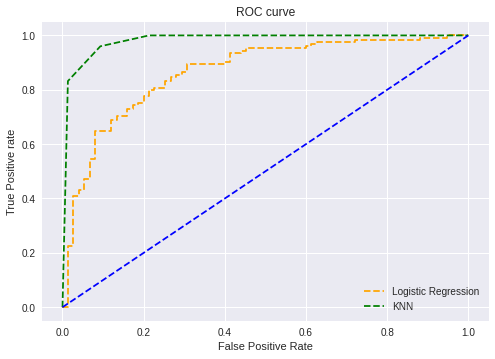

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Es evidente a partir del gráfico que el AUC de la curva ROC de regresión logística es más bajo que el de la curva KNN ROC. Por lo tanto, podemos decir que KNN hizo un mejor trabajo al clasificar la clase positiva en el conjunto de datos.

**AUC-ROC para clasificación de clases múltiples**




La curva AUC-ROC es sólo para problemas de clasificación binaria. Pero podemos extenderlo a problemas de clasificación multiclase utilizando la técnica Uno contra Todos.

Entonces, si tenemos tres clases 0, 1 y 2, la ROC para la clase 0 se generará clasificando 0 contra no 0, es decir, 1 y 2. La ROC para la clase 1 se generará clasificando 1 contra no 1, y así sucesivamente.

La curva ROC para modelos de clasificación de clases múltiples se puede determinar de la siguiente manera:

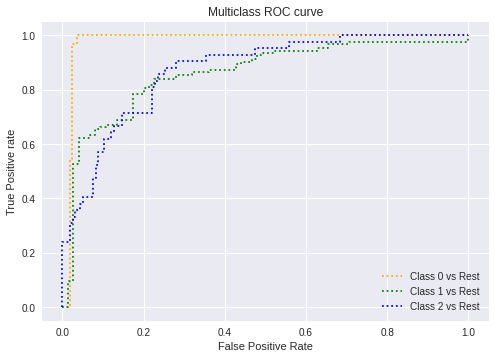

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='dotted',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dotted',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dotted',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/